# step 1: Loading the data

In [1]:
with open("../data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
    
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [2]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [3]:
result = re.split(r'([,.]|\s)', text)

print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [4]:
result = [item for item in result if item.strip()]
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [5]:
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()] # strip the whitespaces
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [6]:
# creating the tokens from the raw text

preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]

In [7]:
print(preprocessed[:20])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was']


# step 2: convert tokens into token IDs

In [8]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

vocab_size

1130

In [9]:
vocab = { tokens: integers for  integers, tokens in enumerate(all_words)}

In [10]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


# Step 3: Creating a Tokenizer_Class

In [11]:
class SimpleTokenizerV1:
    def __init__(self, vocab) -> None:
        self.str_to_int = vocab
        self.int_to_str = { i: s  for s, i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        
        ids = [self.str_to_int[item] for item in preprocessed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text
        

In [12]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [13]:
print(tokenizer.decode(ids))

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


### what if we encounter a word not in the vocabulary?

In [14]:
# text = "Hello, do you like tea?"
# print(tokenizer.encode(text))

In [15]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [16]:
len(vocab.items())


1132

In [17]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [18]:
class SimpleTokenizerV2:
    def __init__(self, vocab) -> None:
        self.str_to_int = vocab
        self.int_to_str = { i: s  for s, i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
                                
        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        
        preprocessed = [item if item in self.str_to_int else '<|unk|>' for item in preprocessed]
        
        ids = [self.str_to_int[item] for item in preprocessed]
        return ids
    
    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text
        

In [19]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [20]:
ids= tokenizer.encode(text)
ids

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [21]:
print(tokenizer.decode(ids))


<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


# step 4: Byte Pair Encoding (BPE) 

In [22]:
!pip install tiktoken

## Tiktoken tokenizer

In [1]:
import importlib
import tiktoken

tokenizer = tiktoken.get_encoding('gpt2')
print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.11.0


In [25]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
     "of someunknownPlace."
)


integers = tokenizer.encode(text, allowed_special={'<|endoftext|>'})

print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [26]:
print(tokenizer.decode(integers))

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


In [27]:
integers = tokenizer.encode("jhusk ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[73, 7537, 74, 220, 959]
jhusk ier


# Step 5:  Creating Input-Target Pairs

In [28]:
with open("../data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [29]:
enc_sample = enc_text[50:]


In [30]:
context_size = 4 #length of the input
#The context_size of 4 means that the model is trained to look at a sequence of 4 words (or tokens) 
#to predict the next word in the sequence. 
#The input x is the first 4 tokens [1, 2, 3, 4], and the target y is the next 4 tokens [2, 3, 4, 5]

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [31]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [32]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))
    

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


# Step 6: Implementing Dataset and Dataloader

<div class="alert alert-block alert-info">
    
Step 1: Tokenize the entire text
    
Step 2: Use a sliding window to chunk the book into overlapping sequences of max_length

Step 3: Return the total number of rows in the dataset

Step 4: Return a single row from the dataset
</div>

In [33]:
from torch.utils.data import Dataset, DataLoader
import torch

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride) -> None: # stride = sliding window
        self.input_ids = []
        self.target_ids = []
        
        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
        
        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunks = token_ids[i:i+max_length]
            target_chunks = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunks))
            self.target_ids.append(torch.tensor(target_chunks))
        
    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
        
        
        

<div class="alert alert-block alert-info">
    
Step 1: Initialize the tokenizer

Step 2: Create dataset

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes
during training

Step 4: The number of CPU processes to use for preprocessing
    
</div>

In [34]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, 
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    tokenizer = tiktoken.get_encoding('gpt2')
    
    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)
    
    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader


In [35]:
with open("../data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [36]:
import torch
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.8.0+cu126
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [37]:
input, output= next(data_iter)
print(input)
print(output)

tensor([[ 367, 2885, 1464, 1807]])
tensor([[2885, 1464, 1807, 3619]])


In [38]:
dataloader = create_dataloader_v1(raw_text, batch_size=4, max_length=8, stride=4, shuffle=False)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[   40,   367,  2885,  1464,  1807,  3619,   402,   271],
        [ 1807,  3619,   402,   271, 10899,  2138,   257,  7026],
        [10899,  2138,   257,  7026, 15632,   438,  2016,   257],
        [15632,   438,  2016,   257,   922,  5891,  1576,   438]]), tensor([[  367,  2885,  1464,  1807,  3619,   402,   271, 10899],
        [ 3619,   402,   271, 10899,  2138,   257,  7026, 15632],
        [ 2138,   257,  7026, 15632,   438,  2016,   257,   922],
        [  438,  2016,   257,   922,  5891,  1576,   438,   568]])]


# Step 7: Creating Tokens Embeddings

In [39]:
input_ids = torch.tensor([2, 3, 5, 1])


In [40]:
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [41]:
print(embedding_layer.weight)


Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [42]:
print(embedding_layer(torch.tensor([3])))


tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [43]:
# extract layer of input

print(embedding_layer(input_ids))


tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


# Step 8: Creating Positional Embeddings

In [44]:
# gpt 2 model 
vocab_size = 50257
output_dim = 256 # actual dimension is start from 768

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [45]:
token_embedding_layer(torch.tensor([1]))

tensor([[ 1.2277, -0.4297, -2.2121, -0.3780,  0.9838, -1.0895, -0.6378, -0.6031,
         -1.7753, -0.7490,  0.2781, -0.9621, -0.4223, -1.1036,  0.8398, -1.0029,
         -0.2835, -0.3767, -0.0306, -0.0894, -0.1965, -0.9713,  0.2790, -0.7587,
          1.0669, -0.2985,  0.8558,  1.6098, -1.1893,  1.1677,  0.6220,  2.5737,
         -1.6179,  0.2265, -0.4382,  0.3265, -1.5786, -1.3995,  0.2425,  0.3648,
         -1.1753,  1.7825,  1.7524, -0.2135,  0.4095,  0.0465,  0.5468,  1.1478,
         -0.8614,  0.5338,  0.9376, -0.9225,  0.7047, -0.2722,  0.0781, -0.1134,
          2.3902, -1.4256, -0.4619, -1.5539, -0.3338,  0.2405, -0.0334,  1.5544,
         -0.2936, -1.8027, -0.6933,  1.7409,  0.2698,  0.9595,  0.7744,  1.8721,
          1.0264, -0.5670, -0.2658, -1.1116, -1.3696, -0.6534, -2.1587,  0.8093,
          1.8388, -0.9473,  0.1419,  0.3696, -0.0174, -0.9575,  1.2968,  0.6833,
          0.4343, -0.1340, -2.1467, -1.7984, -0.6822, -0.5191,  0.1669, -1.2620,
         -0.2443,  0.1327,  

In [46]:
# data loader 
max_length = 4

dataloader = create_dataloader_v1(
    raw_text, batch_size=8 ,   max_length= max_length, 
    stride= max_length, shuffle= False
)

data_iter = iter(dataloader)

In [47]:
ip_first, op_first = next(data_iter)

In [48]:
print("Token IDs:\n", op_first)
print("\nInputs shape:\n", op_first.shape)

Token IDs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])

Inputs shape:
 torch.Size([8, 4])


In [49]:
print(ip_first.shape)

torch.Size([8, 4])


In [50]:
token_embeddings = token_embedding_layer(ip_first)

print(token_embeddings.shape)



torch.Size([8, 4, 256])


In [51]:
# creating positional embedding layer
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

In [52]:
pos_embedding_vectors = pos_embedding_layer(torch.arange(context_length))

pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


In [53]:
pos_embedding_vectors, pos_embedding_vectors.shape

(tensor([[ 1.7375, -0.5620, -0.6303,  ..., -0.2277,  1.5748,  1.0345],
         [ 1.6423, -0.7201,  0.2062,  ...,  0.4118,  0.1498, -0.4628],
         [-0.4651, -0.7757,  0.5806,  ...,  1.4335, -0.4963,  0.8579],
         [-0.6754, -0.4628,  1.4323,  ...,  0.8139, -0.7088,  0.4827]],
        grad_fn=<EmbeddingBackward0>),
 torch.Size([4, 256]))

In [54]:
input_embeddings = token_embeddings + pos_embeddings

In [55]:
pos_embedding_vectors.unsqueeze(0).shape

torch.Size([1, 4, 256])

# Step 9: Simplified Attention Mechanism

In [56]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

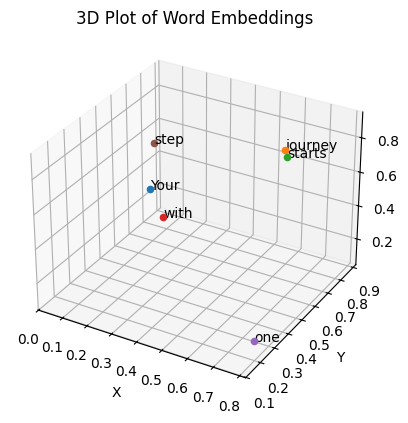

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

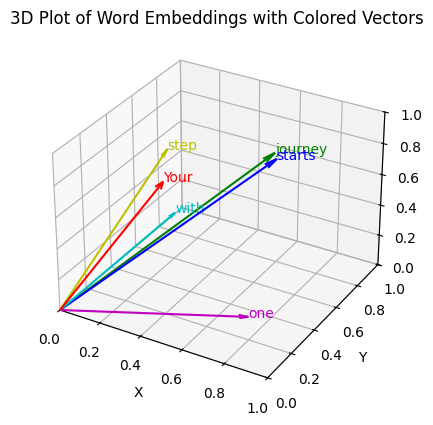

In [58]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


In [59]:
# let's us calculate the attention scores

query = inputs[1]

atten_scores = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    atten_scores[i] = torch.dot( query, x_i)
    
atten_scores


# Your     (x^1)
# journey  (x^2)
# starts   (x^3)
# with     (x^4)
# one      (x^5)
# step     (x^6)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

## Normalization -> attention weights

In [60]:
attn_weights_2_tmp = atten_scores / atten_scores.sum()

print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

Attention weights: tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [61]:
# softmax normalization 
def softmax_naive(x):
    return torch.exp(x)/ torch.exp(x).sum(0)

attn_weights_2_naive = softmax_naive(atten_scores)

print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [62]:
attn_weights_2 = torch.softmax(atten_scores, 0)

print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2_naive.sum())

Attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [63]:
query = inputs[1] # 2nd input token is the query

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


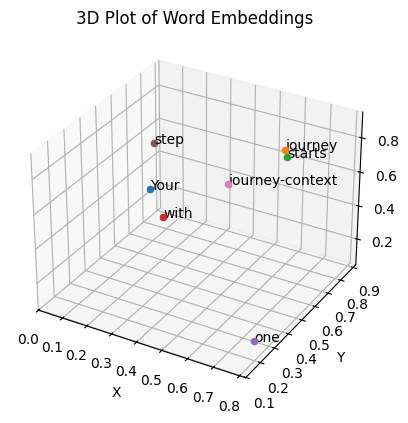

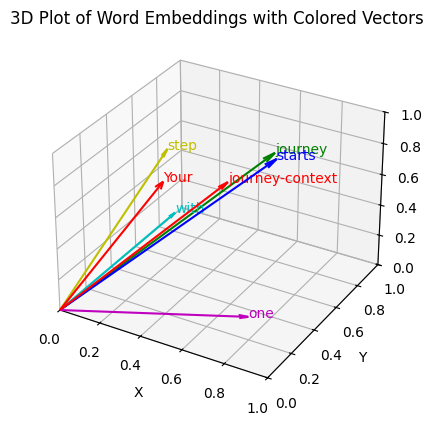

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   [0.4419, 0.6515, 0.5683]]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [65]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
  ]
)

attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [66]:
# easy method

atten_scores = inputs @ inputs.T

atten_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [67]:
# normalizatoin using softmax

atten_weights = torch.softmax(atten_scores, dim=-1) # -1 mean apply accross last dimension here column

atten_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [68]:
# let's verify if all sum is one

atten_weights.sum(dim=-1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [69]:
# context vectors 

all_context_vecs = atten_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# Step 10:  IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS


In [70]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [71]:
x_2 = inputs[1] #A
d_in = inputs.shape[1] #B
d_out = 2 #C

In [72]:
torch.manual_seed(123)

W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False) # we keep it false only for now
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [73]:
W_key

Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])

In [74]:
# calculating query, key and value vector for x^2= Journey

query_2 = x_2 @ W_query 
key_2 = x_2 @ W_key
value_2 = x_2  @ W_value

In [75]:
# getting query, keys, values matrix for all the input token embeddings

keys = inputs @ W_key
values = inputs @ W_value
queries = inputs @ W_query
print("keys.shape:", keys.shape)

print("values.shape:", values.shape)

print("queries.shape:", queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])


In [76]:
# computing the attention scores for Journey

key_2 = keys[1] # Journey
query_2 = queries[1]


atten_scores_2 = query_2 @ keys.T

atten_scores_2

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])

In [77]:
atten_scores = queries @ keys.T

In [78]:
atten_scores

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])

In [79]:
d_k = keys.shape[-1]
attn_weights_2 = torch.softmax(atten_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)
print(d_k)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])
2


In [80]:
attn_weights_2.sum()

tensor(1.)

In [81]:
context_vector_2 = attn_weights_2 @ values
context_vector_2

tensor([0.3061, 0.8210])

In [82]:
# implementing a python class
import torch.nn as nn

class SelfAttention_v1(nn.Module):
    def __init__(self, d_in , d_out) -> None:
        super().__init__()
        
        self.W_query = nn.Parameter(torch.rand(d_in, d_out))
        self.W_key = nn.Parameter(torch.rand(d_in, d_out))
        self.W_value = nn.Parameter(torch.rand(d_in, d_out))
        
    def forward(self, x):
        keys = x @ self.W_key
        queries = x @ self.W_query
        values = x @ self.W_value
        
        atten_scores = queries @ keys.T
        
        atten_weights = torch.softmax(
            atten_scores/ keys.shape[-1] **0.5,
            dim=-1
        )
        
        context_vec = atten_weights @ values
        
        return context_vec

In [83]:
torch.manual_seed(123)

sa_v1 = SelfAttention_v1(d_in=d_in, d_out= d_out)

print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [84]:
# advanced version


class SelfAttention_v2(nn.Module):
    def __init__(self, d_in , d_out, qvk_bias = False) -> None:
        super().__init__()
        
        self.W_query = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qvk_bias)
        
    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        atten_scores = queries @ keys.T
        
        atten_weights = torch.softmax(
            atten_scores/ keys.shape[-1] **0.5,
            dim=-1
        )
        
        context_vec = atten_weights @ values
        
        return context_vec

In [85]:
torch.manual_seed(123)

sa_v2 = SelfAttention_v2(d_in=d_in, d_out= d_out)

print(sa_v2(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


# Step 11: Causual Self attention Mechanism

## HIDING FUTURE WORDS WITH CAUSAL ATTENTION


In [86]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [87]:
queries = sa_v2.W_query(inputs) #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1717, 0.1762, 0.1761, 0.1555, 0.1627, 0.1579],
        [0.1636, 0.1749, 0.1746, 0.1612, 0.1605, 0.1652],
        [0.1637, 0.1749, 0.1746, 0.1611, 0.1606, 0.1651],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.1639],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


In [88]:
context_length = inputs.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [89]:
masked_simple = attn_weights * mask_simple

print(masked_simple)

tensor([[0.1717, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1637, 0.1749, 0.1746, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<MulBackward0>)


In [90]:
rows_sum = mask_simple.sum(1, keepdim=True)
rows_sum

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])

In [91]:
mask_simple_norm = mask_simple/ rows_sum

mask_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]])

In [92]:
# More effiecent way of doing the above procedure

mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)

mask

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [93]:
masked = atten_scores.masked_fill_(mask.bool(), -torch.inf)

In [94]:
masked

tensor([[0.9231,   -inf,   -inf,   -inf,   -inf,   -inf],
        [1.2705, 1.8524,   -inf,   -inf,   -inf,   -inf],
        [1.2544, 1.8284, 1.7877,   -inf,   -inf,   -inf],
        [0.6973, 1.0167, 0.9941, 0.5925,   -inf,   -inf],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707,   -inf],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])

In [95]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3986, 0.6014, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2526, 0.3791, 0.3683, 0.0000, 0.0000, 0.0000],
        [0.2265, 0.2839, 0.2794, 0.2103, 0.0000, 0.0000],
        [0.1952, 0.2363, 0.2331, 0.1820, 0.1534, 0.0000],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])


In [96]:
# dropout class in python

example = torch.ones(6, 6) #B
print(example)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [97]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A

print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [98]:
# batches of data

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

torch.Size([2, 6, 3])


In [99]:
# advanced version


class CausalAttention(nn.Module):
    def __init__(self, d_in , d_out,context_length, dropout,  qvk_bias = False) -> None:
        super().__init__()
        
        self.W_query = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qvk_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length ), diagonal=1))
        
        
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        atten_scores = queries @ keys.transpose(1, 2)
        
        # applying causaual mask
        atten_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf
        )
        
        atten_weights = torch.softmax(
            atten_scores/ keys.shape[-1] **0.5,
            dim=-1
        )
        
        # adding the dropout
        atten_weights = self.dropout(atten_weights)
        
        context_vec = atten_weights @ values
        
        return context_vec

In [100]:
batch.shape

torch.Size([2, 6, 3])

In [101]:
torch.manual_seed(123)

context_length = batch.shape[1]

ca =CausalAttention(d_in=d_in, d_out=d_out, context_length=context_length, dropout=0.0)

context_vecs = ca(batch)



In [102]:
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


In [103]:
print(context_vecs)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


# Step 12: Multihead Attention Mechanism

In [104]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out,  context_length, dropout, num_heads, qkv_bias=False) -> None:
        super().__init__()

        
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [105]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=3)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063,  0.4566,  0.2729],
         [-0.5874,  0.0058,  0.5891,  0.3257,  0.5792,  0.3011],
         [-0.6300, -0.0632,  0.6202,  0.3860,  0.6249,  0.3102],
         [-0.5675, -0.0843,  0.5478,  0.3589,  0.5691,  0.2785],
         [-0.5526, -0.0981,  0.5321,  0.3428,  0.5543,  0.2520],
         [-0.5299, -0.1081,  0.5077,  0.3493,  0.5337,  0.2499]],

        [[-0.4519,  0.2216,  0.4772,  0.1063,  0.4566,  0.2729],
         [-0.5874,  0.0058,  0.5891,  0.3257,  0.5792,  0.3011],
         [-0.6300, -0.0632,  0.6202,  0.3860,  0.6249,  0.3102],
         [-0.5675, -0.0843,  0.5478,  0.3589,  0.5691,  0.2785],
         [-0.5526, -0.0981,  0.5321,  0.3428,  0.5543,  0.2520],
         [-0.5299, -0.1081,  0.5077,  0.3493,  0.5337,  0.2499]]],
       grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 6])


## Multihead Attention Class

In [2]:
import torch
from torch import nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [107]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

batch_size, context_length, d_in = batch.shape
d_out = 100
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.0825,  0.1242, -0.0207,  0.0928, -0.0861, -0.1832, -0.2068,
           0.2259, -0.0570,  0.5080,  0.2237, -0.4238,  0.1803,  0.2058,
          -0.2916, -0.4888,  0.1863,  0.2609, -0.0549, -0.1586,  0.1996,
           0.0068, -0.4228, -0.1244, -0.0797, -0.0826, -0.4994, -0.0637,
           0.2743, -0.1574, -0.3718, -0.1224, -0.1868,  0.1443, -0.2927,
          -0.8442, -0.0073,  0.3188,  0.0058, -0.0425,  0.0953,  0.6122,
          -0.1169,  0.3615,  0.4880, -0.3412,  0.0391,  0.2121,  0.3427,
           0.3520,  0.4442,  0.1150,  0.2052, -0.0166, -0.1913,  0.1066,
          -0.0161,  0.2665, -0.4580, -0.5203, -0.1627, -0.0722, -0.2801,
          -0.0929, -0.1854, -0.2216, -0.1007, -0.3151,  0.3962,  0.0929,
          -0.0643, -0.0717,  0.1787, -0.2632,  0.0694,  0.0880, -0.3666,
           0.2595, -0.0332, -0.1934,  0.1545, -0.5724,  0.2599,  0.1256,
          -0.0819,  0.0803,  0.1259, -0.1083, -0.3516, -0.4381, -0.3585,
          -0.2896,  0.3505,  

# Implementing GPT Model from Scratch to predict next-token 

## Step 13: Birds EyeView of LLM Architecture

In [108]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [109]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.token_emb = nn.Embedding(cfg['vocab_size'], cfg['emb_dim'])
        self.pos_emb = nn.Embedding(cfg['context_length'], cfg['emb_dim'])   
        self.drop_emb = nn.Dropout(cfg['drop_rate'])
        
        # transformer blocks 
        self.trf_block = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg['n_layers'])]
        )
        
        # layer normalization 
        self.final_norm = DummyLayerNorm(cfg['emb_dim'])
        
        self.out_head = nn.Linear(cfg['emb_dim'],cfg['vocab_size'], bias=False )
        
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape 
        
        tok_embeds = self.token_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_block(x)
        x = self.final_norm(x)
        
        logits = self.out_head(x)
        
        return logits
        


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x
        
        
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x
           

### Inferencing the Dummy Model

In [110]:
import tiktoken

tokenizer = tiktoken.get_encoding('gpt2')

batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [111]:
model = DummyGPTModel(GPT_CONFIG_124M)

next_word = model(batch)
next_word

tensor([[[-0.1046,  0.4325,  0.1512,  ..., -0.5654, -0.9792, -0.3756],
         [ 0.1362,  0.5005, -0.1598,  ...,  1.7404,  0.5777, -1.3367],
         [-0.2054,  0.0068,  0.3955,  ..., -0.2324,  2.0468,  0.2754],
         [-0.4163,  0.0588,  1.4688,  ...,  0.5623,  0.9472, -0.5257]],

        [[-0.3555,  1.2467,  0.6443,  ..., -0.5179, -0.5382, -0.1106],
         [-1.2036,  0.4707, -0.6612,  ...,  1.7250,  2.0179,  0.3019],
         [ 0.3115, -1.2805,  0.2801,  ...,  0.3965,  2.3890,  1.1914],
         [ 0.0582,  0.3993,  1.5065,  ...,  0.9054,  1.2546, -0.4114]]],
       grad_fn=<UnsafeViewBackward0>)

In [112]:
next_word.shape 

torch.Size([2, 4, 50257])

## step-14 GPT ARCHITECTURE PART 2: LAYER NORMALIZATION 

In [113]:
import torch
from torch import nn

torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


In [114]:
mean = out.mean(dim=-1, keepdim=True)
var = out.var(dim= -1, keepdim=True)

mean, var

(tensor([[0.1324],
         [0.2170]], grad_fn=<MeanBackward1>),
 tensor([[0.0231],
         [0.0398]], grad_fn=<VarBackward0>))

In [115]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[9.9341e-09],
        [0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [116]:
# Layer Normalization clas

class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

In [117]:
batch_example

tensor([[-0.1115,  0.1204, -0.3696, -0.2404, -1.1969],
        [ 0.2093, -0.9724, -0.7550,  0.3239, -0.1085]])

In [118]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)


Mean:
 tensor([[-2.9802e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


## step 15: GPT ARCHITECTURE PART 3: FEEDFORWARD NEURAL NETWORK WITH GELU ACTIVATION

### Gelu Activaiton

In [119]:
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))


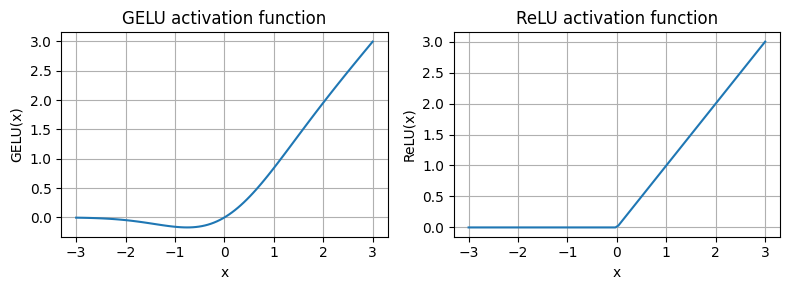

In [120]:
import matplotlib.pyplot as plt

gelu, relu = GELU(), nn.ReLU()

# Some sample data
x = torch.linspace(-3, 3, 100)
y_gelu, y_relu = gelu(x), relu(x)

plt.figure(figsize=(8, 3))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x, y)
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


### FeedForward NN

In [121]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [122]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), ## Expansion
            GELU(), ## Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), ## Contraction
        )

    def forward(self, x):
        return self.layers(x)

In [123]:
ffn = FeedForward(GPT_CONFIG_124M)
x = torch.rand(2, 3, 768) #A
out = ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [124]:
x

tensor([[[0.0351, 0.0028, 0.6470,  ..., 0.5897, 0.8112, 0.1335],
         [0.2758, 0.6665, 0.3312,  ..., 0.7204, 0.3365, 0.9016],
         [0.7622, 0.4008, 0.4706,  ..., 0.4857, 0.9844, 0.0499]],

        [[0.8761, 0.8123, 0.2511,  ..., 0.8113, 0.3147, 0.6469],
         [0.9920, 0.7436, 0.7393,  ..., 0.8690, 0.1667, 0.4374],
         [0.8999, 0.0747, 0.1878,  ..., 0.0586, 0.7915, 0.8741]]])

In [125]:
out

tensor([[[ 0.1238,  0.0457,  0.0939,  ...,  0.1107,  0.0167, -0.1992],
         [ 0.1574, -0.0282,  0.0049,  ...,  0.0026,  0.1120, -0.1075],
         [ 0.1184, -0.0052,  0.0839,  ...,  0.1662,  0.0112, -0.1685]],

        [[ 0.1302,  0.0630,  0.1050,  ...,  0.1439,  0.0562, -0.1128],
         [ 0.1249, -0.0073,  0.1022,  ...,  0.0417,  0.0381, -0.0828],
         [ 0.0494,  0.0654,  0.0347,  ...,  0.0701,  0.0793, -0.1810]]],
       grad_fn=<ViewBackward0>)

## Geleu , LayerNorm, FeedForward NN

In [3]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) * 
            (x + 0.044715 * torch.pow(x, 3))
        ))


class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]), ## Expansion
            GELU(), ## Activation
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]), ## Contraction
        )

    def forward(self, x):
        return self.layers(x)

## Step 16: Shortcut connections in DNN

In [127]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self,layer_sizes , use_shortcut ) -> None:
        super().__init__()
        
        self.use_shortcut = use_shortcut
        
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU())
        ])
        
        
    def forward(self, x):
        for layer in self.layers:
            layer_output = layer(x)
            
            if self. use_shortcut and x.shape == layer_output.shape: 
                x = x+ layer_output
            
            else:
                x = layer_output
                
        return x 

In [128]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # specify random seed for the initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=False
)

In [129]:
def print_gradients(model, x):
    
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    # Calculate loss based on how close the target
    # and output are
    loss = nn.MSELoss()
    loss = loss(output, target)
    
    # Backward pass to calculate the gradients
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Print the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [130]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020173587836325169
layers.1.0.weight has gradient mean of 0.0001201116101583466
layers.2.0.weight has gradient mean of 0.0007152041653171182
layers.3.0.weight has gradient mean of 0.001398873864673078
layers.4.0.weight has gradient mean of 0.005049646366387606


In [131]:
torch.autograd.set_detect_anomaly(True)

In [132]:
torch.manual_seed(123)
model_with_shortcut = ExampleDeepNeuralNetwork(
layer_sizes, use_shortcut=True
)
print_gradients(model_with_shortcut, sample_input.detach())

layers.0.0.weight has gradient mean of 0.22169792652130127
layers.1.0.weight has gradient mean of 0.20694106817245483
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732502937317
layers.4.0.weight has gradient mean of 1.3258541822433472


## Step 17: Entire Transformer Block


In [4]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"], 
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        # 2*4*768
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x
        # 2*4*768

### Inferencing the transformer block 

In [135]:
torch.manual_seed(123)

x = torch.rand(2, 4, 768)

block = TransformerBlock(cfg=GPT_CONFIG_124M)

output = block(x)

print("Input Shape: ", x.shape)
print("Output Shape: ", output.shape )

Input Shape:  torch.Size([2, 4, 768])
Output Shape:  torch.Size([2, 4, 768])


## Step 18: ENTIRE GPT MODEL ARCHITECTURE IMPLEMENTATION

In [5]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

### INFERENCING the GPTModel

In [138]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 0.3613,  0.4222, -0.0711,  ...,  0.3483,  0.4661, -0.2838],
         [-0.1792, -0.5660, -0.9485,  ...,  0.0477,  0.5181, -0.3168],
         [ 0.7120,  0.0332,  0.1085,  ...,  0.1018, -0.4327, -0.2553],
         [-1.0076,  0.3418, -0.1190,  ...,  0.7195,  0.4023,  0.0532]],

        [[-0.2564,  0.0900,  0.0335,  ...,  0.2659,  0.4454, -0.6806],
         [ 0.1230,  0.3653, -0.2074,  ...,  0.7705,  0.2710,  0.2246],
         [ 1.0558,  1.0318, -0.2800,  ...,  0.6936,  0.3205, -0.3178],
         [-0.1565,  0.3926,  0.3288,  ...,  1.2630, -0.1858,  0.0388]]],
       grad_fn=<UnsafeViewBackward0>)


In [139]:
total_params = sum(p.numel() for p in model.parameters())

print(f"Total No. of Model Parametes: {total_params}")

Total No. of Model Parametes: 163009536


In [140]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


In [141]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


In [142]:
total_size_bytes = total_params * 4 #A
total_size_mb = total_size_bytes / (1024 * 1024) #B
print(f"Total size of the model: {total_size_mb:.2f} MB")

Total size of the model: 621.83 MB


## STEP 19: GPT ARCHITECTURE PART 7: GENERATING TEXT FROM OUTPUT TOKENS

In [6]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx = (batch, n_tokens)
    for _ in range(max_new_tokens):
        
        # print(idx)
        # only use limited context_length
        idx_condn =     idx[:, -context_size:]
        
        with torch.no_grad():
            logits = model(idx_condn)
            
        # (batch, n_tokens, vocab_size) -----> (batch, vocab_size)
        logits = logits[:, -1, :]
        
        # probas
        probas = torch.softmax(logits, dim=-1) # (batch, vocab_size)
        
        # next word index
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)
        
        # print(idx_next)
        
        # appending the running index
        idx = torch.cat((idx, idx_next), dim=-1)
        
        
    return idx
        
        

### Inferencing the model

In [144]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [145]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:", encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0).to(device) #A
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [146]:
model.eval()
model.to(device)

out = generate_text_simple(
    model = model,
    idx = encoded_tensor,
    max_new_tokens=6, 
    context_size=GPT_CONFIG_124M['context_length'],
    
)

print("Output:", out)
print("Input Shape:", encoded_tensor.shape, )
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]],
       device='cuda:0')
Input Shape: torch.Size([1, 4])
Output length: 10


In [147]:
# decoding the text
decoded_text = tokenizer.decode(out.squeeze(0).tolist())

print(decoded_text )

Hello, I am Featureiman Byeswickattribute argue


## Step 20: Evaluating GPT Model

In [148]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();  # Disable dropout during inference

### text_to_token_id and token_id_to_text_function

In [28]:
import tiktoken 


def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())





In [ ]:
start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")


token_ids = generate_text_simple(
    model, 
    idx= text_to_token_ids(start_context, tokenizer).to(device), 
    max_new_tokens=10, 
    context_size=GPT_CONFIG_124M['context_length']
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

### Calculating the text generation loss: cross-entropy and perplexity

In [149]:
inputs = torch.tensor([[16833, 3626, 6100],   # ["every effort moves",
                       [40,    1107, 588]])   #  "I really like"]

targets = torch.tensor([[3626, 6100, 345  ],  # [" effort moves you",
                        [1107,  588, 11311]]) #  " really like chocolate"]

In [150]:
with torch.no_grad():
    logits = model(inputs)
    
probas = torch.softmax(logits, dim=-1)
print(probas.shape) # batch_size * no_of_tokens * vocab_size

torch.Size([2, 3, 50257])


In [151]:
# calculating the tokens_ids

token_ids = torch.argmax(probas, dim=-1, keepdim=True)

print(token_ids)

tensor([[[16657],
         [13866],
         [44376]],

        [[49906],
         [29669],
         [ 6972]]])


In [152]:
print(f"Targets batch 1: {token_ids_to_text(targets[0], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[0].flatten(), tokenizer)}")

Targets batch 1:  effort moves you
Outputs batch 1:  Armedbage inaction


In [153]:
print(f"Targets batch 1: {token_ids_to_text(targets[1], tokenizer)}")
print(f"Outputs batch 1: {token_ids_to_text(token_ids[1].flatten(), tokenizer)}")

Targets batch 1:  really like chocolate
Outputs batch 1:  pressuring empoweredowed


In [154]:
probas.shape

torch.Size([2, 3, 50257])

In [155]:
# Extracting the probability for corresponding indices

text_idx = 0 # for the first batch 

target_probas_1 = probas[text_idx, [0, 1, 2] , targets[text_idx]]

target_probas_2 = probas[1, [0, 1, 2], targets[1]]

print("Text 1:", target_probas_1)

print("Text 2:", target_probas_2)



Text 1: tensor([7.4541e-05, 3.1295e-05, 1.2547e-05])
Text 2: tensor([1.0337e-05, 5.4615e-05, 5.2042e-06])


In [156]:
# log probas
log_probas = torch.log(torch.cat((target_probas_1 , target_probas_2)))
print(log_probas)


tensor([ -9.5042, -10.3720, -11.2860, -11.4798,  -9.8152, -12.1660])


In [157]:
# calculating the average probability for each token 
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor(-10.7706)


In [158]:
neg_avg_log_probas = avg_log_probas * -1
print(neg_avg_log_probas)

tensor(10.7706)


In [159]:
# Logits have shape (batch_size, num_tokens, vocab_size)
print("Logits shape:", logits.shape)

# Targets have shape (batch_size, num_tokens)
print("Targets shape:", targets.shape)

Logits shape: torch.Size([2, 3, 50257])
Targets shape: torch.Size([2, 3])


> Calculating the cross entropy loss using torch module

In [160]:
logits_flat = logits.flatten(   0, 1)
targets_flat = targets.flatten()

print(logits_flat.shape)
print(targets_flat.shape)

torch.Size([6, 50257])
torch.Size([6])


In [161]:
loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)

print(loss)

tensor(10.7706)


In [162]:
# perplecity 

perplexity = torch.exp(loss)

print(perplexity)

tensor(47598.3164)


> For next (token) prediction our model is as uncertain as if it has to choose randomly from vocabulary of the 47598 tokens

## Step 21: Calculating the training and validation set losses


In [163]:
with open('../data/the-verdict.txt', "r", encoding="utf-8") as file:
    text_data = file.read()

In [164]:
# First 100 characters
print(text_data[:99])

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [165]:
# Last 100 characters
print(text_data[-99:])

it for me! The Strouds stand alone, and happen once--but there's no exterminating our kind of art."


In [166]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

In [167]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


In [168]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256, 
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [169]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}


In [170]:
# spliting the dataset

train_ratio = 0.9
split_idx = int(train_ratio * len(text_data))

train_data = text_data[:split_idx]
val_data = text_data[split_idx: ]

torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M['context_length'],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True, 
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [171]:
# Sanity check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

In [172]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

print(len(train_loader))
print(len(val_loader))


Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


In [173]:
train_tokens = 0
for input_batch, target_batch in train_loader:
    train_tokens += input_batch.numel()

val_tokens = 0
for input_batch, target_batch in val_loader:
    val_tokens += input_batch.numel()

print("Training tokens:", train_tokens)
print("Validation tokens:", val_tokens)
print("All tokens:", train_tokens + val_tokens)

Training tokens: 4608
Validation tokens: 512
All tokens: 5120


In [174]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();  # Disable dropout during inference

In [175]:
# function to calculate the batch loss
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)

    # Print shapes for debugging
    # print(input_batch.shape)
    # print(target_batch.shape)
    # print(logits.shape)

    # Flatten logits and targets for cross-entropy
    logits_flat = logits.flatten(0, 1)
    targets_flat = target_batch.flatten()
    loss = torch.nn.functional.cross_entropy(logits_flat, targets_flat)

    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0

    if len(data_loader) == 0:
        return float('nan')

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device=device)
            total_loss += loss.item()
        else:
            break

    return total_loss / num_batches


In [176]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987567265828451
Validation loss: 10.979267120361328


In [177]:
import torch
torch.cuda.is_available() 

True

In [178]:
import torch
print(torch.__version__)           # 2.0.1+cu118
print(torch.version.cuda)          # 11.8
print(torch.cuda.is_available())   # True
print(torch.cuda.get_device_name(0))  # NVIDIA GeForce GTX 1650


2.8.0+cu126
12.6
True
NVIDIA GeForce GTX 1650


In [179]:
torch.__version__

'2.8.0+cu126'

In [180]:
torch.cuda.is_available()

True

## Step 22: LLm Pre-training Loop

In [181]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
           max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()
    



In [182]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    
    # Initialize lists to track losses and tokens seen
    train_losses = torch.tensor([], dtype=torch.float32)
    val_losses = torch.tensor([], dtype=torch.float32)
    track_tokens_seen = torch.tensor([], dtype=torch.int64)
    tokens_seen, global_step = 0, -1
    
    for epoch in range(num_epochs):
        model.train()
        
        for input_batch, target_batch in train_loader:
            
            optimizer.zero_grad()
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            
            loss.backward()
            
            optimizer.step()
            
            tokens_seen += input_batch.numel()
            
            global_step +=1

           # Optional evaluation step
            if global_step % eval_freq == 0: 
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses = torch.cat([train_losses, torch.tensor([train_loss])])
                val_losses = torch.cat([val_losses, torch.tensor([val_loss])])
                track_tokens_seen = torch.cat([track_tokens_seen, torch.tensor([tokens_seen])])
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )
            
    
    return train_losses, val_losses, track_tokens_seen   
    
            


In [183]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce GTX 1650'

In [184]:

import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)


end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 9.825, Val loss 9.926
Ep 1 (Step 000005): Train loss 8.070, Val loss 8.336
Every effort moves you,.                                                
Ep 2 (Step 000010): Train loss 6.623, Val loss 7.045
Ep 2 (Step 000015): Train loss 6.050, Val loss 6.603
Every effort moves you, and,, and,,,,,,, and,.                                   
Ep 3 (Step 000020): Train loss 5.576, Val loss 6.503
Ep 3 (Step 000025): Train loss 5.432, Val loss 6.375
Every effort moves you, and, and the picture, and, and, and, and, and, and, and, and, and, and, and, and, and the of the, and, and, and the, and the, and, and,
Ep 4 (Step 000030): Train loss 4.894, Val loss 6.374
Ep 4 (Step 000035): Train loss 4.770, Val loss 6.284
Every effort moves you had the "I was a of the picture the picture.        "I was, and he had. I had the his a he had the of the picture to the of the picture of the picture was a
Ep 5 (Step 000040): Train loss 3.914, Val loss 6.177
Every effort moves you know 

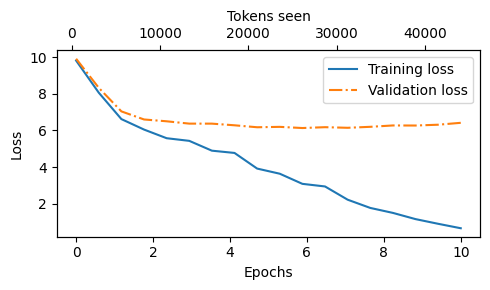

In [185]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    # plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))

plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)



# DECODING STRATEGIES TO CONTROL RANDOMNESS

In [186]:
# model.to("cpu")
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_out): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [187]:
# inferencing the model

tokenizer = tiktoken.get_encoding('gpt2')

token_ids = generate_text_simple(
    model=model, 
    idx= text_to_token_ids('Every effort moves you', tokenizer).to(device),
    max_new_tokens=25, 
    context_size=GPT_CONFIG_124M['context_length']
    
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))


Output text:
 Every effort moves you?"

"Yes--quite insensible to the fact with a laugh: "Yes--and by me!"




## Step 23:  DECODING STRATEGY 1: TEMPERATURE SCALING

In [188]:
vocab = { 
    "closer": 0,
    "every": 1, 
    "effort": 2, 
    "forward": 3,
    "inches": 4,
    "moves": 5, 
    "pizza": 6,
    "toward": 7,
    "you": 8,
} 

inverse_vocab = {v: k for k, v in vocab.items()}

In [189]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

next_token_logits2 = next_token_logits/0.1

next_token_logits3 = next_token_logits/5

In [190]:
torch.set_printoptions(sci_mode=False)

In [191]:
probas = torch.softmax(next_token_logits2, dim=0)

print(probas)



tensor([    0.0000,     0.0000,     0.0000,     0.9910,     0.0000,     0.0000,
            0.0000,     0.0090,     0.0000])


In [192]:
probas = torch.softmax(next_token_logits3, dim=0)

print(probas)

tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])


In [193]:
probas = torch.softmax(next_token_logits, dim=0)

print(probas)

next_token_id = torch.argmax(probas).item()

print(next_token_id)

print(inverse_vocab[next_token_id])

tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040])
3
forward


In [194]:
torch.manual_seed(123)

next_token_id = torch.multinomial(probas, num_samples=1).item()

print(next_token_id)
print(inverse_vocab[next_token_id])

3
forward


In [195]:
def print_sampled_tokens(probas):
    torch.manual_seed(123)
    sample = [torch.multinomial(probas, num_samples=1).item() for _ in range(100) ]
    sample_idx = torch.bincount(torch.tensor(sample))
    
    for i, freq in enumerate(sample_idx):
        print(f"{freq} x {inverse_vocab[i]}")


print_sampled_tokens(probas)

4 x closer
0 x every
0 x effort
64 x forward
1 x inches
0 x moves
0 x pizza
31 x toward


In [196]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits/ temperature
    
    return torch.softmax(scaled_logits, dim=-1)

# Temperature values
temperatures = [1, 0.1, 5]  # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

In [197]:
scaled_probas

[tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
             0.0001,     0.3576,     0.0040]),
 tensor([    0.0000,     0.0000,     0.0000,     0.9910,     0.0000,     0.0000,
             0.0000,     0.0090,     0.0000]),
 tensor([0.1546, 0.0750, 0.0429, 0.2421, 0.0869, 0.0454, 0.0430, 0.2203, 0.0898])]

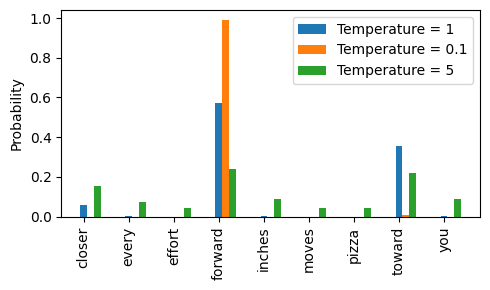

In [198]:
# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()

## Step 23: DECODING STRATEGY 2: Top-k sampling

In [199]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

In [200]:
top_k = 3
top_logits, top_pos = torch.topk(next_token_logits, k=top_k)

print(top_logits)
print(top_pos)

tensor([6.7500, 6.2800, 4.5100])
tensor([3, 7, 0])


In [201]:
new_logits = torch.where(
    condition=next_token_logits< top_logits[-1],
    input=torch.tensor(float('-inf')),
    other=next_token_logits
    
)


print(new_logits)


tensor([4.5100,   -inf,   -inf, 6.7500,   -inf,   -inf,   -inf, 6.2800,   -inf])


In [202]:
topk_probas = torch.softmax(new_logits, dim=-1)

print(topk_probas)

tensor([0.0615, 0.0000, 0.0000, 0.5775, 0.0000, 0.0000, 0.0000, 0.3610, 0.0000])


### New Generate function with decoding startegies

In [7]:
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]

        # New: Filter logits with top_k sampling
        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)

        # New: Apply temperature scaling
        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [154]:
torch.manual_seed(123)

token_ids = generate(
    model=model.to(device),
    idx=text_to_token_ids("Every effort moves you", tokenizer).to(device),
    max_new_tokens=30,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=100,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you Oo fe reminder implementation vetoworksora Krug revolves crime Roots independWave elementary treatingholders� darkened dissertation HawaiiBLIC ballot SAT flash OCTitteesoffensive affiliate whites decriminal


# Step 25: LOADING AND SAVING MODEL WEIGHTS IN PYTORCH

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
torch.save(model.state_dict(), "model.pth")

In [ ]:
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(torch.load("model.pth"))
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_out): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

torch.save({
    "model_state_dict": model.state_dict(),
    "optimizer_state_dict": optimizer.state_dict(),
    }, 
    "model_and_optimizer.pth"
)

In [ ]:
checkpoint = torch.load("model_and_optimizer.pth")
model = GPTModel(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["model_state_dict"])
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4, weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train();

# Step: 26 LOADING PRETRAINED WEIGHTS FROM OPENAI

In [8]:
import tensorflow as tf
import tqdm

print("TensorFlow version:", tf.__version__)
print("tqdm version:", tqdm.__version__)

TensorFlow version: 2.20.0
tqdm version: 4.67.1


In [29]:
from gpt_download3 import download_and_load_gpt2

settings, params = download_and_load_gpt2(model_size="124M", models_dir="gpt2")

d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\checkpoint


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\encoder.json


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\hparams.json


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\model.ckpt.data-00000-of-00001


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\model.ckpt.index


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\model.ckpt.meta


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\vocab.bpe


In [ ]:
print("Settings:", settings)
print("Parameter dictionary keys:", params.keys())

Settings: {'n_vocab': 50257, 'n_ctx': 1024, 'n_embd': 768, 'n_head': 12, 'n_layer': 12}
Parameter dictionary keys: dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])


In [ ]:
params['blocks'][0].keys()

dict_keys(['attn', 'ln_1', 'ln_2', 'mlp'])

In [ ]:
# Define model configurations in a dictionary for compactness
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG.update(model_configs[model_name])


In [155]:
NEW_CONFIG.update({"context_length": 1024, "qkv_bias": True})
gpt = GPTModel(NEW_CONFIG)
gpt.eval();

In [156]:
NEW_CONFIG

{'vocab_size': 50257,
 'context_length': 1024,
 'emb_dim': 768,
 'n_heads': 12,
 'n_layers': 12,
 'drop_rate': 0.1,
 'qkv_bias': True}

In [157]:
gpt.trf_blocks[0].att.W_query.weight.shape

torch.Size([768, 768])

In [159]:
params.keys()

dict_keys(['blocks', 'b', 'g', 'wpe', 'wte'])

In [ ]:
print(params["wte"])
print("Token embedding weight tensor dimensions:", params["wte"].shape)

[[-0.11010301 -0.03926672  0.03310751 ... -0.1363697   0.01506208
   0.04531523]
 [ 0.04034033 -0.04861503  0.04624869 ...  0.08605453  0.00253983
   0.04318958]
 [-0.12746179  0.04793796  0.18410145 ...  0.08991534 -0.12972379
  -0.08785918]
 ...
 [-0.04453601 -0.05483596  0.01225674 ...  0.10435229  0.09783269
  -0.06952604]
 [ 0.1860082   0.01665728  0.04611587 ... -0.09625227  0.07847701
  -0.02245961]
 [ 0.05135201 -0.02768905  0.0499369  ...  0.00704835  0.15519823
   0.12067825]]
Token embedding weight tensor dimensions: (50257, 768)


## Load Weight to gpt function

In [10]:
import numpy as np

def assign(left, right):
    if left.shape != right.shape:
        raise ValueError(f"Shape mismatch. Left: {left.shape}, Right: {right.shape}")
    return torch.nn.Parameter(torch.tensor(right))

def load_weights_into_gpt(gpt, params):
    gpt.pos_emb.weight = assign(gpt.pos_emb.weight, params['wpe'])
    gpt.tok_emb.weight = assign(gpt.tok_emb.weight, params['wte'])
    
    for b in range(len(params["blocks"])):
        q_w, k_w, v_w = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["w"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.weight = assign(
            gpt.trf_blocks[b].att.W_query.weight, q_w.T)
        gpt.trf_blocks[b].att.W_key.weight = assign(
            gpt.trf_blocks[b].att.W_key.weight, k_w.T)
        gpt.trf_blocks[b].att.W_value.weight = assign(
            gpt.trf_blocks[b].att.W_value.weight, v_w.T)

        q_b, k_b, v_b = np.split(
            (params["blocks"][b]["attn"]["c_attn"])["b"], 3, axis=-1)
        gpt.trf_blocks[b].att.W_query.bias = assign(
            gpt.trf_blocks[b].att.W_query.bias, q_b)
        gpt.trf_blocks[b].att.W_key.bias = assign(
            gpt.trf_blocks[b].att.W_key.bias, k_b)
        gpt.trf_blocks[b].att.W_value.bias = assign(
            gpt.trf_blocks[b].att.W_value.bias, v_b)

        gpt.trf_blocks[b].att.out_proj.weight = assign(
            gpt.trf_blocks[b].att.out_proj.weight, 
            params["blocks"][b]["attn"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].att.out_proj.bias = assign(
            gpt.trf_blocks[b].att.out_proj.bias, 
            params["blocks"][b]["attn"]["c_proj"]["b"])

        gpt.trf_blocks[b].ff.layers[0].weight = assign(
            gpt.trf_blocks[b].ff.layers[0].weight, 
            params["blocks"][b]["mlp"]["c_fc"]["w"].T)
        gpt.trf_blocks[b].ff.layers[0].bias = assign(
            gpt.trf_blocks[b].ff.layers[0].bias, 
            params["blocks"][b]["mlp"]["c_fc"]["b"])
        gpt.trf_blocks[b].ff.layers[2].weight = assign(
            gpt.trf_blocks[b].ff.layers[2].weight, 
            params["blocks"][b]["mlp"]["c_proj"]["w"].T)
        gpt.trf_blocks[b].ff.layers[2].bias = assign(
            gpt.trf_blocks[b].ff.layers[2].bias, 
            params["blocks"][b]["mlp"]["c_proj"]["b"])

        gpt.trf_blocks[b].norm1.scale = assign(
            gpt.trf_blocks[b].norm1.scale, 
            params["blocks"][b]["ln_1"]["g"])
        gpt.trf_blocks[b].norm1.shift = assign(
            gpt.trf_blocks[b].norm1.shift, 
            params["blocks"][b]["ln_1"]["b"])
        gpt.trf_blocks[b].norm2.scale = assign(
            gpt.trf_blocks[b].norm2.scale, 
            params["blocks"][b]["ln_2"]["g"])
        gpt.trf_blocks[b].norm2.shift = assign(
            gpt.trf_blocks[b].norm2.shift, 
            params["blocks"][b]["ln_2"]["b"])

    gpt.final_norm.scale = assign(gpt.final_norm.scale, params["g"])
    gpt.final_norm.shift = assign(gpt.final_norm.shift, params["b"])
    gpt.out_head.weight = assign(gpt.out_head.weight, params["wte"])



In [162]:
gpt = GPTModel(NEW_CONFIG)

gpt.eval();

In [163]:
load_weights_into_gpt(gpt, params)
gpt.to(device);

In [163]:
gpt.pos_emb.weight

Parameter containing:
tensor([[-1.8821e-02, -1.9742e-01,  4.0267e-03,  ..., -4.3044e-02,
          2.8267e-02,  5.4490e-02],
        [ 2.3959e-02, -5.3792e-02, -9.4879e-02,  ...,  3.4170e-02,
          1.0172e-02, -1.5573e-04],
        [ 4.2161e-03, -8.4764e-02,  5.4515e-02,  ...,  1.9745e-02,
          1.9325e-02, -2.1424e-02],
        ...,
        [-1.7987e-03,  1.6052e-03, -5.5103e-02,  ...,  1.3617e-02,
         -7.1805e-03,  3.7552e-03],
        [ 3.2105e-03,  1.5501e-03, -4.8944e-02,  ...,  2.0725e-02,
         -1.1838e-02, -5.5683e-04],
        [ 2.6610e-04,  3.0272e-03, -1.7086e-03,  ..., -4.6506e-03,
         -2.3541e-03, -5.7855e-03]], device='cuda:0', requires_grad=True)

In [164]:
params['wpe']

array([[-1.8820720e-02, -1.9741860e-01,  4.0267250e-03, ...,
        -4.3043736e-02,  2.8267192e-02,  5.4490108e-02],
       [ 2.3959434e-02, -5.3792033e-02, -9.4878644e-02, ...,
         3.4170013e-02,  1.0171850e-02, -1.5572949e-04],
       [ 4.2160717e-03, -8.4763914e-02,  5.4514930e-02, ...,
         1.9744711e-02,  1.9324856e-02, -2.1423856e-02],
       ...,
       [-1.7986511e-03,  1.6052092e-03, -5.5103153e-02, ...,
         1.3616630e-02, -7.1805264e-03,  3.7552188e-03],
       [ 3.2105497e-03,  1.5500595e-03, -4.8944373e-02, ...,
         2.0725457e-02, -1.1837787e-02, -5.5682898e-04],
       [ 2.6609693e-04,  3.0272407e-03, -1.7086461e-03, ...,
        -4.6505518e-03, -2.3541194e-03, -5.7855090e-03]],
      shape=(1024, 768), dtype=float32)

In [168]:
torch.manual_seed(123)

token_ids = generate(
    model=gpt,
    idx=text_to_token_ids("Every effort moves you", tokenizer).to(device),
    max_new_tokens=50,
    context_size=NEW_CONFIG["context_length"],
    top_k=10,
    temperature=1.4
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you along as the game evolves.

The game starts with a simple story. You start off your adventure with a simple goal: to save a world from a giant robot, and you are given a choice whether to take part or leave.




# Finetunning LLM for Classfication

## step 27: preparing and pre-processing dataset

In [9]:
import pandas as pd

df = pd.read_csv('../data/classification/SMSSpamCollection', sep="\t", header=None, names=["Label", "Text"])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.Label.value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [12]:
# creating a balcance dataaset. 
def create_balanced_dataset(df):
    
    # Count the instances of "spam"
    num_spam = df[df["Label"] == "spam"].shape[0]
    
    # Randomly sample "ham" instances to match the number of "spam" instances
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)
    
    # Combine ham "subset" with "spam"
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

Label
ham     747
spam    747
Name: count, dtype: int64


In [13]:
balanced_df['Label'] = balanced_df['Label'].map({'ham': 0, 'spam': 1})

In [14]:
def random_split(df, train_frac, validation_frac):
    # Shuffle the entire DataFrame
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Calculate split indices
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # Split the DataFrame
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)
# Test size is implied to be 0.2 as the remainder


In [15]:
print(len(train_df))
print(len(validation_df))
print(len(test_df))

1045
149
300


In [16]:
train_df.to_csv("../data/classification/train.csv", index=None)
validation_df.to_csv("../data/classification/validation.csv", index=None)
test_df.to_csv("../data/classification/test.csv", index=None)

In [17]:
train_df.iloc[0][ 'Label']

np.int64(0)

## step 28: Dataset and Dataloader for Finetunning

In [18]:

from torch.utils.data import DataLoader, Dataset
import torch
import pandas as pd


class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length= None, pad_token_id = 50256) -> None:
        self.data = pd.read_csv(csv_file)
        
        # pretokenize text
        self.encoded_texts = [
            tokenizer.encode(sentence) for sentence in self.data['Text']
        ]        

        if max_length == None:
            self.max_length = self._longest_encoded_length()

        else:  # trancutation
            self.max_length= max_length
            
            self.encoded_texts = [
                text[:self.max_length] for text in self.encoded_texts
            ] 
        
        # padding   
        self.encoded_texts = [ 
                encoded_text + [pad_token_id] * (self.max_length - len(encoded_text))  
                for encoded_text in self.encoded_texts
                ]
    
    def __len__(self):
        return len(self.encoded_texts)
    
        
    def __getitem__(self, index) :
        encoded_text = self.encoded_texts[index]
        label = self.data.iloc[index]['Label']
        
        return (
            torch.tensor(encoded_text, dtype= torch.long),
            torch.tensor(label, dtype= torch.long)
        )
       
    
    def _longest_encoded_length(self):
        max_length = 0
        
        for text in self.encoded_texts:
            if len(text)> max_length:
                max_length = len(text)
        
        return max_length
    


In [19]:
import tiktoken

tokenizer = tiktoken.get_encoding('gpt2')

In [20]:
train_dataset = SpamDataset('../data/classification/train.csv', tokenizer=tokenizer, max_length=None)

train_dataset.max_length

120

In [21]:
val_dataset = SpamDataset(
    csv_file="../data/classification/validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)
test_dataset = SpamDataset(
    csv_file="../data/classification/test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

In [22]:
# Dataloader
num_workers = 0
batch_size = 8

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True, 
    num_workers=num_workers, 
    drop_last = False
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True, 
    num_workers=num_workers, 
    drop_last = False
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    shuffle=True, 
    num_workers=num_workers, 
    drop_last = False
)


In [23]:
print("Train loader:")
for input_batch, target_batch in train_loader:
    pass

print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions", target_batch.shape)

Train loader:
Input batch dimensions: torch.Size([5, 120])
Label batch dimensions torch.Size([5])


In [24]:
print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

131 training batches
19 validation batches
38 test batches


### INITIALIZING A MODEL WITH PRETRAINED WEIGHTS

In [25]:
CHOOSE_MODEL = "gpt2-small (124M)"
INPUT_PROMPT = "Every effort moves"

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

assert train_dataset.max_length <= BASE_CONFIG["context_length"], (
    f"Dataset length {train_dataset.max_length} exceeds model's context "
    f"length {BASE_CONFIG['context_length']}. Reinitialize data sets with "
    f"`max_length={BASE_CONFIG['context_length']}`"
)

In [26]:
model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")

from gpt_download3 import download_and_load_gpt2

settings, params = download_and_load_gpt2(model_size=model_size, models_dir="gpt2")

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();

d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\checkpoint


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\encoder.json


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\hparams.json


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\model.ckpt.data-00000-of-00001


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\model.ckpt.index


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\model.ckpt.meta


d:\jpt\FM\learning_extra\llm-from-scratch\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'openaipublic.blob.core.windows.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


File already exists and is up-to-date: gpt2\124M\vocab.bpe


In [29]:
text_1 = "Every effort moves you"

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_1, tokenizer),
    max_new_tokens=15,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

Every effort moves you forward.

The first step is to understand the importance of your work


In [30]:
text_2 = (
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    " 'You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award.'"
)

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"]
)

print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.'

The following text 'spam'? Answer with 'yes' or 'no': 'You are a winner


In [31]:
token_ids = generate(
    model = model, 
    idx=text_to_token_ids(text_2, tokenizer),
    max_new_tokens=23,
    context_size=BASE_CONFIG["context_length"], 
    temperature=1.4,
    top_k=25,
    eos_id=None
)
print(token_ids_to_text(token_ids, tokenizer))

Is the following text 'spam'? Answer with 'yes' or 'no': 'You are a winner you have been specially selected to receive $1000 cash or a $2000 award.' Answer with 'yes' or 'no': "no." Answer with a word such as "I hope you will


In [32]:
print(model)

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.0, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.0, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=7

In [33]:
# freezing all the parameters in the model. 
for param in model.parameters():
    param.requires_grad= False

## Step 29: MOdifying the model_architecture 
> changing output dim = num_classes

In [34]:
BASE_CONFIG

{'vocab_size': 50257,
 'context_length': 1024,
 'drop_rate': 0.0,
 'qkv_bias': True,
 'emb_dim': 768,
 'n_layers': 12,
 'n_heads': 12}

In [35]:
torch.manual_seed(123)

num_classes = 2
model.out_head = torch.nn.Linear(in_features=BASE_CONFIG['emb_dim'], out_features= num_classes) 

#until now only last layer params will be updated

> Enabling updating of last(12 ^ th) transformer and final_layer norm params to be updated

In [36]:
# transformer
for param in model.trf_blocks[-1].parameters():
    param.requires_grad = True

for param in model.final_norm.parameters():
    param.requires_grad = True
    
# note; we can experiment like enabling last two layer trasformer and so on.

In [37]:
inputs = tokenizer.encode("Do you have time")

inputs = torch.tensor(inputs).unsqueeze(0)
print("Inputs:", inputs)
print("Inputs dimensions:", inputs.shape) # shape: (batch_size, num_tokens)

Inputs: tensor([[5211,  345,  423,  640]])
Inputs dimensions: torch.Size([1, 4])


In [38]:
with torch.no_grad():
    outputs = model(inputs)
    
print("Outputs:\n", outputs)
print("Outputs dimensions:", outputs.shape) # shape: (batch_size, num_tokens, num_classes)

Outputs:
 tensor([[[-1.5854,  0.9904],
         [-3.7235,  7.4548],
         [-2.2661,  6.6049],
         [-3.5983,  3.9902]]])
Outputs dimensions: torch.Size([1, 4, 2])


In [39]:
print(f"Last output token: {outputs[:, -1, :]}")

Last output token: tensor([[-3.5983,  3.9902]])


## Step 30: CALCULATING THE CLASSIFICATION LOSS AND ACCURACY

In [40]:
probas = torch.softmax(outputs[:, -1, :], dim=-1)
label = torch.argmax(probas)
print("Class label:", label.item())

logits = outputs[:, -1, :]
label = torch.argmax(logits)
print("Class label:", label.item())

Class label: 1
Class label: 1


In [43]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    
    correct_predictions, num_examples = 0, 0
    
    if num_batches == None:
        num_batches = len(data_loader)
    else: 
        num_batches = min(num_batches, len(data_loader))
        
    for i,(input_batch, target_batch) in enumerate(data_loader):
        
        if i<num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            
            with torch.no_grad():
                output = model(input_batch)[:,-1, :] # logits of last output batch
            
            predicted_labels = torch.argmax(output, dim=-1)
            
            num_examples  += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        
        else:
            break
    
    return correct_predictions/ num_examples
    
        

### Calculating train, test, and validation accuracy

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)


torch.manual_seed(123) 

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 46.25%
Validation accuracy: 53.75%
Test accuracy: 50.00%


### Cross-Entropy Loss

In [105]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device, non_blocking=True), target_batch.to(device, non_blocking=True)
    
    logits = model(input_batch)[:, -1, :]
    
    loss = torch.nn.functional.cross_entropy(logits   , target_batch)
    
    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    model.eval()
    
    total_loss = 0
    
    if num_batches == None:
        num_batches = len(data_loader)
    else: 
        num_batches = min(num_batches, len(data_loader))
        
    for i,(input_batch, target_batch) in enumerate(data_loader):
        
        if i<num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model,device)
            total_loss += loss.item()
        else:
            break
    
    return total_loss/num_batches


In [56]:
with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

print(f"Training loss: {train_loss:.3f}")
print(f"Validation loss: {val_loss:.3f}")
print(f"Test loss: {test_loss:.3f}")

Training loss: 2.326
Validation loss: 3.089
Test loss: 2.310


## Step 31: Finetunning LLM for classification function:


<div class="alert alert-block alert-info">
    
Step 1: Set model to training mode

Step 2: Reset loss gradients from previous batch iteration

Step 3: Calculate loss gradients

Step 4: Update model weights using loss gradients

Step 5: New: track examples instead of tokens

Step 6: Optional evaluation step

Step 7: Calculate accuracy after each epoch

</div>

In [57]:
def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter):
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1
    
    # main training loop
    for epoch in range(num_epochs):
        # model train:
        model.train()
        
        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            
            # backward pass
            loss.backward()
            
            # updating the parameters
            optimizer.step()
            
            examples_seen += input_batch.shape[0]
            global_step +=1
            
            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [58]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.153, Val loss 2.859
Ep 1 (Step 000050): Train loss 0.631, Val loss 0.618
Ep 1 (Step 000100): Train loss 0.498, Val loss 0.561
Training accuracy: 72.50% | Validation accuracy: 75.00%
Ep 2 (Step 000150): Train loss 0.484, Val loss 0.502
Ep 2 (Step 000200): Train loss 0.368, Val loss 0.497
Ep 2 (Step 000250): Train loss 0.435, Val loss 0.358
Training accuracy: 70.00% | Validation accuracy: 92.50%
Ep 3 (Step 000300): Train loss 0.391, Val loss 0.414
Ep 3 (Step 000350): Train loss 0.430, Val loss 0.299
Training accuracy: 87.50% | Validation accuracy: 90.00%
Ep 4 (Step 000400): Train loss 0.225, Val loss 0.218
Ep 4 (Step 000450): Train loss 0.213, Val loss 0.234
Ep 4 (Step 000500): Train loss 0.175, Val loss 0.113
Training accuracy: 97.50% | Validation accuracy: 97.50%
Ep 5 (Step 000550): Train loss 0.109, Val loss 0.090
Ep 5 (Step 000600): Train loss 0.044, Val loss 0.096
Ep 5 (Step 000650): Train loss 0.082, Val loss 0.105
Training accuracy: 100.00% | Valid

## Visualising the loss and accuracy of LLM classifier

In [59]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for examples seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    # plt.savefig(f"{label}-plot.pdf")
    plt.show()

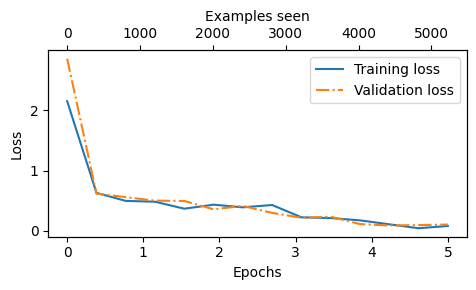

In [60]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

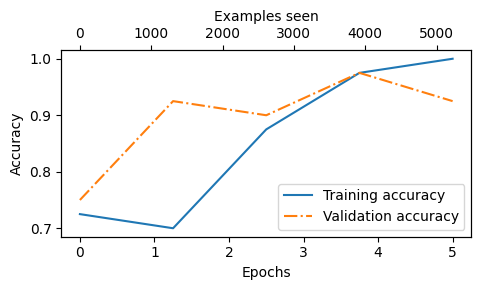

In [61]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")

> The Flactuation in the validation accuracy is due to the fact that we only use num_batches=5 for evaluation

In [62]:
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Training accuracy: {train_accuracy*100:.2f}%")
print(f"Validation accuracy: {val_accuracy*100:.2f}%")
print(f"Test accuracy: {test_accuracy*100:.2f}%")

Training accuracy: 97.03%
Validation accuracy: 95.97%
Test accuracy: 95.67%


## Step 32: Inferencing the LLM Classifier

In [98]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()
    
    # prepare input to model 
    input_ids = tokenizer.encode(text)
    
    supported_context_length = model.pos_emb.weight.shape[0]
    input_ids = input_ids[:min(max_length, supported_context_length)]
    
    # padding 
    input_ids += [pad_token_id] * (max_length-len(input_ids))
    
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0)
    
    # model inference 
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]    # only last token logits
    
    predicted_label = torch.argmax(logits, dim=-1).item()
    # print(logits, predicted_label)
    
    # return the result
    return "spam" if predicted_label == 1 else "not spam"

In [99]:

text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print('INput: ',text_1)
print('Output: ',classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length
))


INput:  You are a winner you have been specially selected to receive $1000 cash or a $2000 award.
Output:  spam


In [100]:

text_2 = (
    "Hey, just wanted to check if we're still on"
    " for dinner tonight? Let me know!"
)

print('INput: ',text_2)
print('Output: ',classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length
))


INput:  Hey, just wanted to check if we're still on for dinner tonight? Let me know!
Output:  not spam


## STEP 33: SAVING THE MODEL DICT

In [101]:
torch.save(model.state_dict(), "../models/review_classifier.pth")

# LLM-Instrucition Finetunning 

## STEP 34: PREPARING DATASET of Instruction Finetunning

In [1]:
import json
import os
import urllib
import ssl

def download_and_load_file(file_path, url):
    ssl_context = ssl.create_default_context()
    ssl_context.check_hostname = False
    ssl_context.verify_mode = ssl.CERT_NONE

    if not os.path.exists(file_path):
        with urllib.request.urlopen(url, context=ssl_context) as response:
            text_data = response.read().decode("utf-8")
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(text_data)
    else:
        with open(file_path, "r", encoding="utf-8") as file:
            text_data = file.read()

    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    return data


file_path = "../data/instruction-data.json"
url = (
    "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch"
    "/main/ch07/01_main-chapter-code/instruction-data.json"
)

data = download_and_load_file(file_path, url)
print("Number of entries:", len(data))


Number of entries: 1100


### Converting text into alpaca input format.

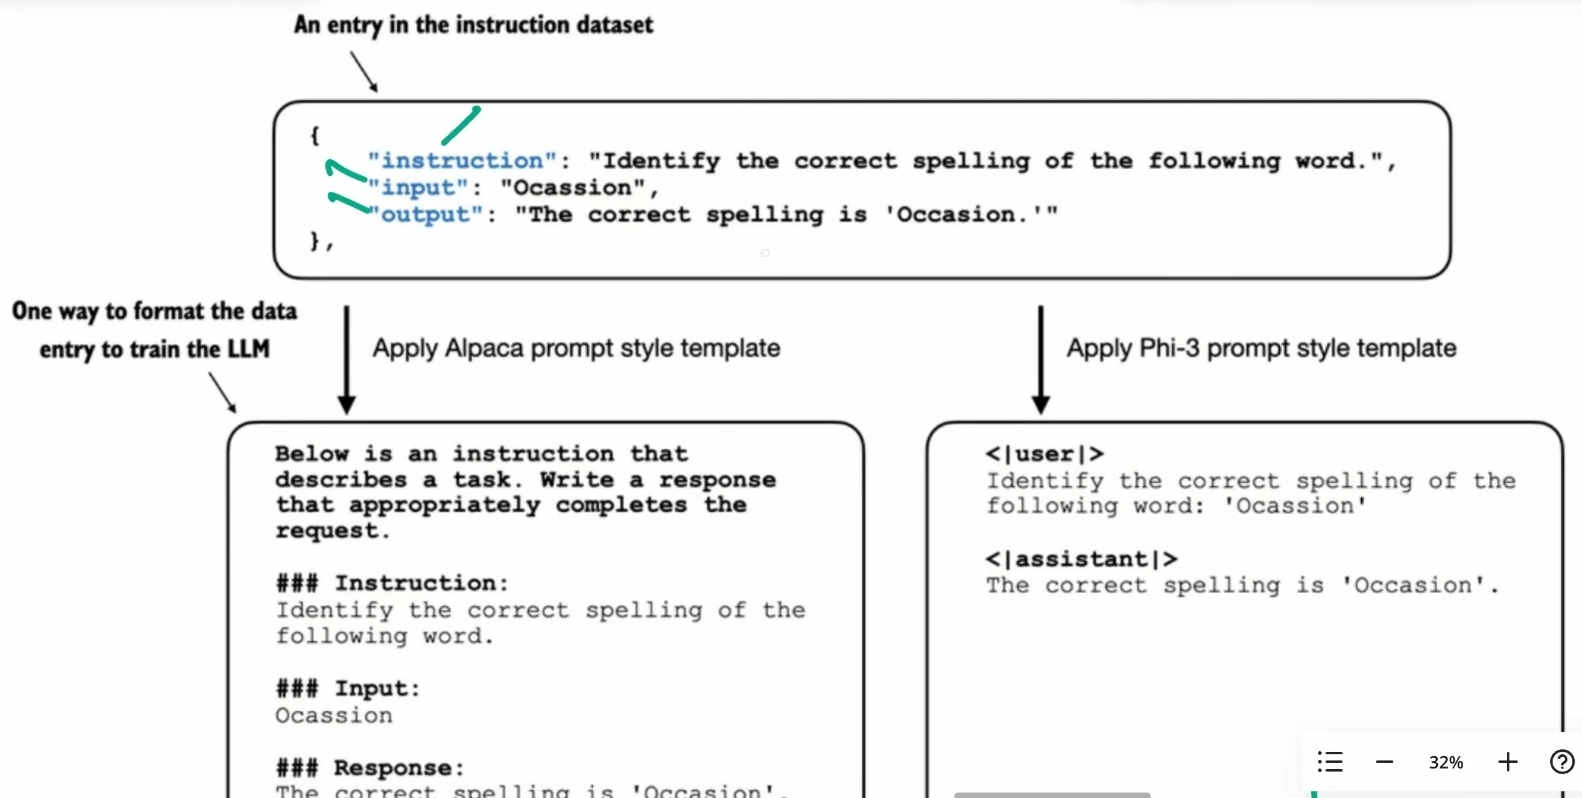

In [2]:
data[0]

{'instruction': 'Evaluate the following phrase by transforming it into the spelling given.',
 'input': 'freind --> friend',
 'output': 'The spelling of the given phrase "freind" is incorrect, the correct spelling is "friend".'}

### Input format function

In [3]:
def format_input(entry):
    instruction_text = (
        f"Below is an instruction that describes a task."
        f"Write a response that appropriately completes the request"
        f"\n\n### Instruction:\n{entry['instruction']}"
    )
    input_text =f"\n\n### Input:\n{entry['input']}" if entry['input'] else ""
    
    
    return instruction_text + input_text

In [4]:
print(format_input(data[0]))

Below is an instruction that describes a task.Write a response that appropriately completes the request

### Instruction:
Evaluate the following phrase by transforming it into the spelling given.

### Input:
freind --> friend


In [5]:
model_input = format_input(data[50])
desired_response= f"\n\n### Response:\n{data[50]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task.Write a response that appropriately completes the request

### Instruction:
Identify the correct spelling of the following word.

### Input:
Ocassion

### Response:
The correct spelling is 'Occasion.'


In [6]:
model_input = format_input(data[999])
desired_response= f"\n\n### Response:\n{data[999]['output']}"

print(model_input + desired_response)

Below is an instruction that describes a task.Write a response that appropriately completes the request

### Instruction:
What is an antonym of 'complicated'?

### Response:
An antonym of 'complicated' is 'simple'.


### Train Test And Validation Split

In [7]:
train_portion = int(len(data)* 0.85)
test_portion = int(len(data) * .10)
val_portion = int(len(data) - train_portion- test_portion)

print(train_portion)
print(test_portion)
print(val_portion)

train_data = data[:train_portion]
test_data = data[train_portion:train_portion + test_portion]
val_data = data[train_portion + test_portion:]

print("Training set length:", len(train_data))
print("Validation set length:", len(val_data))
print("Test set length:", len(test_data))

935
110
55
Training set length: 935
Validation set length: 55
Test set length: 110


## STEP 35: ORGANIZING DATA INTO TRAINING BATCHES

In [8]:
import torch
from torch.utils.data import Dataset

class InstructionDataset(Dataset):
    def __init__(self, data, tokenizer) -> None:
        self.data = data
        
        # endcoded prompts
        self.encoded_texts = []
        
        for entry in data:
            instruction_input = format_input(entry)
            response_format =  f"\n\n### Response:\n{entry['output']}"
            full_text = instruction_input + response_format
            
            self.encoded_texts.append(
                tokenizer.encode(full_text)
                )
            
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index) :
        return self.encoded_texts[index]

In [9]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

print(tokenizer.encode("<|endoftext|>", allowed_special={"<|endoftext|>"}))

[50256]


### Padding the input tokens per batch 

In [10]:
def custom_collate_draft_1(
    batch,
    pad_token_id=50256,
    device="cpu"
):
    
    batch_max_length = max([len(item)+1 for item in batch])
    
    inputs_list = []
    
    for item in batch:
        new_item = item.copy()
        
        new_item += [pad_token_id]
        
        padded = (new_item +[pad_token_id] *
                  (batch_max_length - len(new_item))
        )
        
        inputs = torch.tensor(padded[:-1])
        
        inputs_list.append(inputs)
        
    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_list).to(device)
    return inputs_tensor
        

In [11]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

print(custom_collate_draft_1(batch))

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])


### Padding the input, output tokens per batch 

In [12]:
def custom_collate_draft_2(
    batch,
    pad_token_id=50256,
    device="cpu"
):
    
    batch_max_length = max([len(item)+1 for item in batch])
    
    inputs_list = []
    targets_list = [] 
    
    for item in batch:
        new_item = item.copy()
        
        new_item += [pad_token_id]
        
        padded = (new_item +[pad_token_id] *
                  (batch_max_length - len(new_item))
        )
        
        inputs = torch.tensor(padded[:-1])
        targets = torch.tensor(padded[1:])
        inputs_list.append(inputs)
        targets_list.append(targets)
        
    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_list).to(device)
    targets_tensor = torch.stack(targets_list).to(device)
    
    return inputs_tensor, targets_tensor
        

In [13]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = custom_collate_draft_2(batch)
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3,     4],
        [    5,     6, 50256, 50256, 50256],
        [    7,     8,     9, 50256, 50256]])
tensor([[    1,     2,     3,     4, 50256],
        [    6, 50256, 50256, 50256, 50256],
        [    8,     9, 50256, 50256, 50256]])


In [14]:
mask = targets == 50256

In [15]:
mask

tensor([[False, False, False, False,  True],
        [False,  True,  True,  True,  True],
        [False, False,  True,  True,  True]])

In [16]:
indices = torch.nonzero(mask).squeeze()
indices

tensor([[0, 4],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [2, 2],
        [2, 3],
        [2, 4]])

In [17]:
indices.numel()

16

### custom collate funtion for data_batching

In [18]:
def custom_collate_fn(
    batch,
    pad_token_id=50256,
    ignore_index=-100,
    allowed_max_length=None,
    device="cpu"
):
    
    batch_max_length = max([len(item)+1 for item in batch])
    
    inputs_list = []
    targets_list = [] 
    
    for item in batch:
        new_item = item.copy()
        
        new_item += [pad_token_id]
        
        padded = (new_item +[pad_token_id] *
                  (batch_max_length - len(new_item))
        )
        
        inputs = torch.tensor(padded[:-1])
        targets = torch.tensor(padded[1:])
        
        mask = targets == pad_token_id
        indices = torch.nonzero(mask).squeeze()
        
        if indices.numel()>1:
            targets[indices[1:]] = ignore_index
                
        # trancuate to max_allowed_tokens_length
        if allowed_max_length is not None:
            inputs = inputs[:allowed_max_length]
            targets = targets[:allowed_max_length]
        
        inputs_list.append(inputs)
        targets_list.append(targets)
        
    # Convert list of inputs to tensor and transfer to target device
    inputs_tensor = torch.stack(inputs_list).to(device)
    targets_tensor = torch.stack(targets_list).to(device)
    
    return inputs_tensor, targets_tensor
        

In [19]:
inputs_1 = [0, 1, 2, 3, 4]
inputs_2 = [5, 6]
inputs_3 = [7, 8, 9]

batch = (
    inputs_1,
    inputs_2,
    inputs_3
)

inputs, targets = custom_collate_fn(batch, allowed_max_length=4)
print(inputs)
print(targets)

tensor([[    0,     1,     2,     3],
        [    5,     6, 50256, 50256],
        [    7,     8,     9, 50256]])
tensor([[    1,     2,     3,     4],
        [    6, 50256,  -100,  -100],
        [    8,     9, 50256,  -100]])


### DataLoaders for intruction Finetunning


In [24]:
from torch.utils.data import DataLoader
from functools import partial


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# wrapping the custom collate funtion 

customized_collate_fn = partial(custom_collate_fn,
                                device=device, 
                                allowed_max_length=1024
                                )

num_workers = 0
batch_size = 8

torch.manual_seed(123)

train_dataset = InstructionDataset(train_data, tokenizer)

train_loader = DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    num_workers=num_workers, 
    collate_fn=customized_collate_fn, 
    drop_last=True
)

val_dataset = InstructionDataset(val_data, tokenizer)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

test_dataset = InstructionDataset(test_data, tokenizer)
test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    collate_fn=customized_collate_fn,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers
)

In [23]:
print("Train loader:")
for inputs, targets in train_loader:
    print(inputs.shape, targets.shape)

Train loader:
torch.Size([8, 60]) torch.Size([8, 60])
torch.Size([8, 75]) torch.Size([8, 75])
torch.Size([8, 72]) torch.Size([8, 72])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 64]) torch.Size([8, 64])
torch.Size([8, 71]) torch.Size([8, 71])
torch.Size([8, 79]) torch.Size([8, 79])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 61]) torch.Size([8, 61])
torch.Size([8, 74]) torch.Size([8, 74])
torch.Size([8, 61]) torch.Size([8, 61])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 66]) torch.Size([8, 66])
torch.Size([8, 76]) torch.Size([8, 76])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 78]) torch.Size([8, 78])
torch.Size([8, 70]) torch.Size([8, 70])
torch.Size([8, 65]) torch.Size([8, 65])
torch.Size([8, 82]) torch.Size([8, 82])
torch.Size([8, 67]) torch.Size([8, 67])
torch.Size([8, 79]) torch.Size([8, 79])
torch.Size([8, 70]) torch.Size([8, 70])
torch.Size([8, 68]) torch.Size([8, 68])
torch.Size([8, 64]) torch.Size([8, 64])
torch.Size([8, 67]) torch.

## STEP 36: LOADING A PRETRAINED LLM GPT-2 (355M)

In [2]:
import tensorflow as tf
import tqdm

from scripts.gpt_download3 import download_and_load_gpt2


In [ ]:

BASE_CONFIG = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 1024,  # Context length
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": True         # Query-key-value bias
}

model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

CHOOSE_MODEL = "gpt2-medium (355M)"

BASE_CONFIG.update(model_configs[CHOOSE_MODEL])

model_size = CHOOSE_MODEL.split(" ")[-1].lstrip("(").rstrip(")")
settings, params = download_and_load_gpt2(
    model_size=model_size,
    models_dir="./models_dict/gpt2"
)

model = GPTModel(BASE_CONFIG)
load_weights_into_gpt(model, params)
model.eval();

## Step 37: Inferencing the pretrained model

In [3]:
torch.manual_seed(123)
input_text = format_input(val_data[0])
print(input_text)

token_ids = generate(
    model=model,
    idx=text_to_token_ids(input_text, tokenizer),
    max_new_tokens=35,
    context_size=BASE_CONFIG["context_length"],
    eos_id=50256,
)
generated_text = token_ids_to_text(token_ids, tokenizer)
response_text = generated_text[len(input_text):].strip()
print(response_text)